In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,auc,roc_curve,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay

In [623]:
df = pd.read_csv('mail_data.csv')

In [624]:
print(df)
df.info()

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category

In [625]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [626]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [627]:
df['spam']=df['Category'].apply(lambda x:1 if x=='ham'else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [628]:
X_train,X_test,Y_train,Y_test = train_test_split(df.Message,df.spam,test_size=0.30)

In [629]:
V=CountVectorizer()
X_train_count = V.fit_transform(X_train.values)
X_train_count.toarray()[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [630]:
model_NB = MultinomialNB()
model_LG = LogisticRegression()
model_linear = SVC(kernel = 'linear')
model_rbf = SVC(kernel = 'rbf')

model_NB.fit(X_train_count,Y_train)
model_LG.fit(X_train_count,Y_train)
model_linear.fit(X_train_count,Y_train)
model_rbf.fit(X_train_count,Y_train)

SVC()

In [631]:
X_test_count = V.transform(X_test)
model_NB.score(X_test_count,Y_test)

0.9874401913875598

In [632]:
pred_NB = model_NB.predict(X_test_count)
pred_LG = model_LG.predict(X_test_count)
pred_lin = model_linear.predict(X_test_count)
pred_rbf = model_rbf.predict(X_test_count)

In [633]:
cm_NB = confusion_matrix(Y_test,pred_NB)
cm_LG = confusion_matrix(Y_test,pred_LG)
cm_linear = confusion_matrix(Y_test,pred_lin)
cm_rbf = confusion_matrix(Y_test,pred_rbf)

In [634]:
cm_NB_disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB,display_labels=[0,1])
cm_LG_disp = ConfusionMatrixDisplay(confusion_matrix=cm_LG,display_labels=[0,1])
cm_linear_disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear,display_labels=[0,1])
cm_rbf_disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf,display_labels=[0,1])

MULTINOMIAL NAIVE BAYES


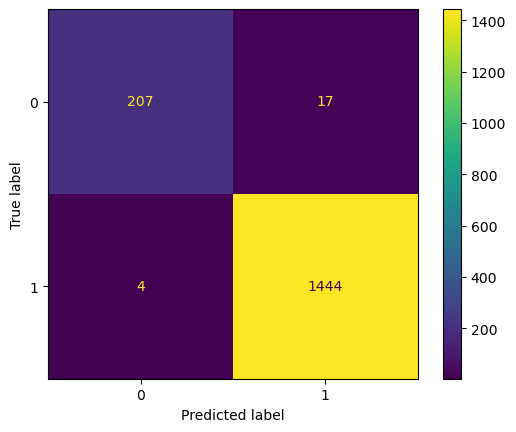

In [635]:
print("MULTINOMIAL NAIVE BAYES")
cm_NB_disp.plot()
plt.savefig("MULTINOMIAL NAIVE BAYES.jpg")

LOGISTIC REGRESSION


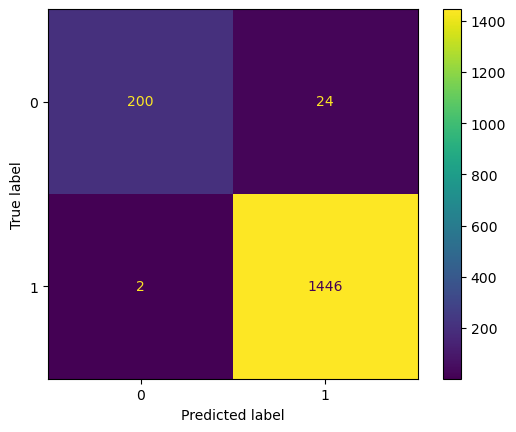

In [636]:
print("LOGISTIC REGRESSION")
cm_LG_disp.plot()
plt.savefig("LOGISTIC REGRESSION.jpg")

SVM LINEAR


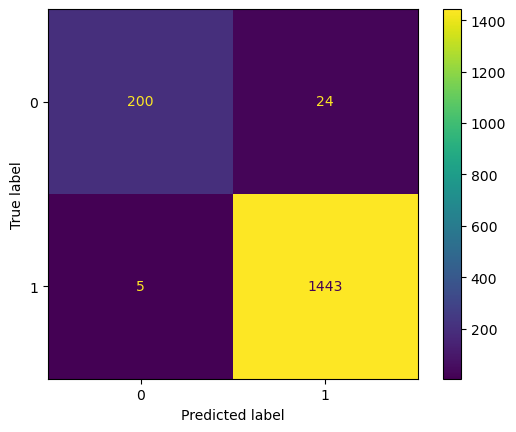

In [637]:
print("SVM LINEAR")
cm_linear_disp.plot()
plt.savefig("SVM_LINEAR.jpg")

SVM NON-LINEAR


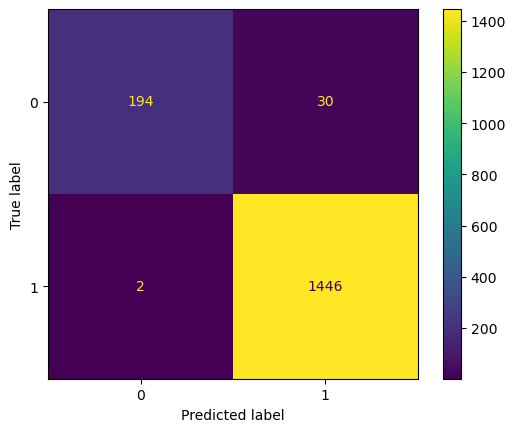

In [638]:

print("SVM NON-LINEAR")
cm_rbf_disp.plot()
plt.savefig("SVM_NON-LINEAR.jpg")

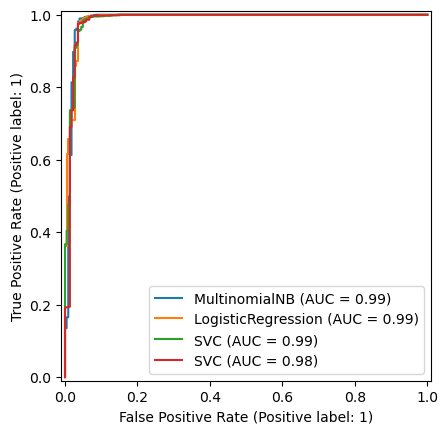

In [639]:
NB_ROC_disp = RocCurveDisplay.from_estimator(model_NB, X_test_count, Y_test)
LG_ROC_disp = RocCurveDisplay.from_estimator(model_LG, X_test_count, Y_test, ax=NB_ROC_disp.ax_)
LINEAR_ROC_disp = RocCurveDisplay.from_estimator(model_linear, X_test_count, Y_test, ax=NB_ROC_disp.ax_)
rbf_ROC_disp = RocCurveDisplay.from_estimator(model_rbf, X_test_count, Y_test, ax=NB_ROC_disp.ax_)
plt.savefig("ROC_CURVE.jpg")

In [640]:
accuracy_NB = accuracy_score(Y_test, pred_NB)
precision_NB = precision_score(Y_test, pred_NB, average=None)
recall_NB = recall_score(Y_test, pred_NB, average=None)
f1_NB = f1_score(Y_test, pred_NB, average=None)

accuracy_LG = accuracy_score(Y_test, pred_LG)
precision_LG = precision_score(Y_test, pred_LG, average=None)
recall_LG = recall_score(Y_test, pred_LG, average=None)
f1_LG = f1_score(Y_test, pred_LG, average=None)

accuracy_linear = accuracy_score(Y_test, pred_lin)
precision_linear = precision_score(Y_test, pred_lin, average=None)
recall_linear = recall_score(Y_test, pred_lin, average=None)
f1_linear = f1_score(Y_test, pred_lin, average=None)

accuracy_rbf = accuracy_score(Y_test, pred_rbf)
precision_rbf = precision_score(Y_test, pred_rbf, average=None)
recall_rbf = recall_score(Y_test, pred_rbf, average=None)
f1_rbf = f1_score(Y_test, pred_rbf, average=None)

In [641]:
tp_NB, fn_NB,fp_NB,tn_NB= cm_NB.ravel()#ravel() is function which convert into a 1D array 
tp_LG, fn_LG,fp_LG,tn_LG= cm_LG.ravel()
tp_linear, fn_linear,fp_linear,tn_linear= cm_linear.ravel()
tp_rbf, fn_rbf,fp_rbf,tn_rbf= cm_rbf.ravel()

In [642]:
fpr_NB = fp_NB/(fp_NB+tn_NB)
fpr_LG = fp_LG/(fp_LG+tn_LG)
fpr_linear = fp_linear/(fp_linear+tn_linear)
fpr_rbf = fp_rbf/(fp_rbf+tn_rbf)

In [643]:
fnr_NB = fn_NB/(fn_NB+tp_NB)
fnr_LG = fn_LG/(fn_LG+tp_LG)
fnr_linear = fn_linear/(fn_linear+tp_linear)
fnr_rbf = fn_rbf/(fn_rbf+tp_rbf)

In [644]:
for i, class_label in enumerate(['0','1']):
    print("\n\t\tNaive Bayes    Logistic Regression \tSVM Linear     SVM rbf")
    print(f"Precision - {class_label}\t  {precision_NB[i]:.2f}\t\t\t{precision_LG[i]:.2f}\t\t  {precision_linear[i]:.2f} \t\t{precision_rbf[i]:.2f}")
    print(f"Recall    - {class_label}\t  {recall_NB[i]:.2f}\t\t\t{recall_LG[i]:.2f}\t\t  {recall_linear[i]:.2f} \t\t{recall_rbf[i]:.2f}")
    print(f"F1_score  - {class_label}\t  {f1_NB[i]:.2f}\t\t\t{f1_LG[i]:.2f}\t\t  {f1_linear[i]:.2f} \t\t{f1_rbf[i]:.2f}")

print(f"\nAccuracy - \t  {accuracy_NB* 100:.2f}%\t\t{accuracy_LG* 100:.2f}%\t\t{accuracy_linear* 100:.2f}% \t\t{accuracy_rbf* 100:.2f}%")

print(f"\nFPR      - \t  {fpr_NB:.2f}\t\t\t{fpr_LG:.2f}\t\t  {fpr_linear:.2f}\t\t{fpr_rbf:.2f}")  


print(f"\nFNR      - \t  {fnr_NB:.2f}\t\t\t{fnr_LG:.2f}\t\t  {fnr_linear:.2f}\t\t{fnr_rbf:.2f}")   






		Naive Bayes    Logistic Regression 	SVM Linear     SVM rbf
Precision - 0	  0.98			0.99		  0.98 		0.99
Recall    - 0	  0.92			0.89		  0.89 		0.87
F1_score  - 0	  0.95			0.94		  0.93 		0.92

		Naive Bayes    Logistic Regression 	SVM Linear     SVM rbf
Precision - 1	  0.99			0.98		  0.98 		0.98
Recall    - 1	  1.00			1.00		  1.00 		1.00
F1_score  - 1	  0.99			0.99		  0.99 		0.99

Accuracy - 	  98.74%		98.44%		98.27% 		98.09%

FPR      - 	  0.00			0.00		  0.00		0.00

FNR      - 	  0.08			0.11		  0.11		0.13
